In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
# libraries to build algorithm
import sys
import numpy as np
from numpy import linalg as la
# libraries to import data
from sklearn.datasets import make_regression
# libraries for plotting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# libraries for in-built algorithm
from sklearn import decomposition

In [93]:
# custom classes and functions
sys.path.append('..')
from utils.plotting import plot_regression_data

## Load data

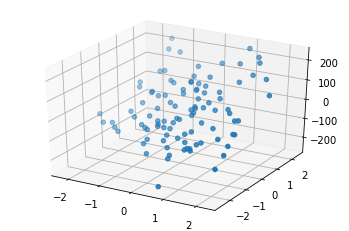

In [110]:
X, y = make_regression(n_samples=100, n_features=2, n_informative=1, n_targets=1, bias = 0, noise = 4, random_state =0)
plot_regression_data(X, y)

In [111]:
X = np.concatenate((X, y.reshape(-1,1)), axis=1)

In [112]:
X.shape

(100, 3)

## Algorithm

In [109]:
class PCA():
    '''input data must be mean centered and standardized'''
    
    def __init__(self):
        self.mean_center = mean_center
        self.standardize = standardize
        self.summary_ = None
        
    def covariance_matrix(self, X):
        '''X is mean centered'''
        return np.matmul(X.T, X)
    
    def sort_eigvecs_by_eigvals(self, eigvals, eigvecs):
        '''return columns of eigvecs sorted by eigval in descending order'''
        return eigvecs[:, np.argsort(eigvals)[::-1]]
    
    def fit(self, X):
        '''X: (m,n)'''
        self.X = X
        S = self.covariance_matrix(self.X) # n,n
        self.eigvals, self.eigvecs = la.eig(S) # eigvals: n, eigvecs: n,n
        self.U = self.sort_eigvecs_by_eigvals(self.eigvals, self.eigvecs)
        
    def summary(self):
        if self.summary_ is None:
            var_X = np.sum(self.X*self.X)
            var_U = []
            for i in range(self.U.shape[1]):
                Ui = self.U[:, i].reshape(-1,1) # n,1
                z = np.matmul(Ui.T, self.X.T) # Ui.T: 1,n; X_test: n,m => 1,m
                x_approx = np.matmul(Ui, z).T # Ui: n,1; z: 1,m => n,m .T=> m,n
                error = np.sum(np.power(self.X - x_approx, 2))
                var_i = error / var_X
                var_U.append(1 - var_i)
            cum_var_U = [sum(var_U[:i]) for i in range(1,len(var_U)+1)]
            self.summary_ = {'variance':var_U, 'cumulative_variance':cum_var_U}
        return self.summary_
    
    def get_k(self, percent_variance_retained):
        '''returns index of the first value >= required percentage'''
        return len([i for i in self.summary_['cumulative_variance'] if i >= percent_variance_retained]) - 1
             
    def transform(self, X_test, k_start = 0, k = None, percent_variance_retained = 0.99):
        '''X_test: (q,n)'''
        if k is None:
            summary = self.summary()
            k = self.get_k(percent_variance_retained)
        U_reduced = self.U[:, :k]
        return np.matmul(U_reduced.T, X_test.T).T
        
        
    
        

## Apply algorithm

In [113]:
# mean center and standardize data
X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)

In [114]:
pca = PCA()
pca.fit(X)
Z = pca.transform(X, k = 2)

In [115]:
pca.summary()

{'variance': [0.6669371441174309, 0.3328181635594114, 0.0002446923231577136],
 'cumulative_variance': [0.6669371441174309, 0.9997553076768423, 1.0]}

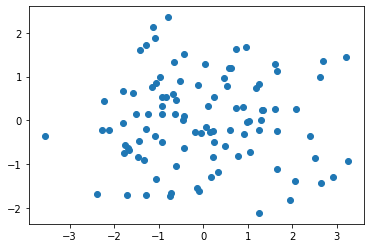

In [116]:
plot_regression_data(Z[:, 0].reshape(-1,1), Z[:, 1])

## Compare with in-built algorithm

In [117]:
pca2 = decomposition.PCA(n_components = 2)
pca2.fit(X)
Z2 = pca2.transform(X)

In [118]:
pca2.explained_variance_ratio_

array([0.66693714, 0.33281816])

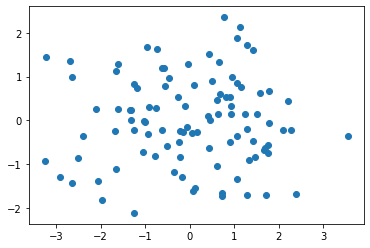

In [119]:
plot_regression_data(Z2[:, 0].reshape(-1,1), Z2[:, 1])